<a href="https://colab.research.google.com/github/nahidame/QuaziNahida.github.io/blob/main/3_Project_Personal_Loan_Campaign_Quazi_Nahida_Sultana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h2><center>Personal Loan Campaign- Project </center></h2></b>

### **Description**

### **Objective**

> **1.** To predict whether a liability customer will buy a personal loan or not <br>
 **2.** Which variables are most significant. <br>
 **3.** Which segment of customers should be targeted more <br>
  **4.** Based on the analysis generate a set of insights and recommendations that will help the business. <br><br>


### **Data Description:**

The detailed data dictionary is given below.- <br>

> **1.** ID: Customer ID <br> 
  **2.** Age: Customer’s age in completed years <br>
  **3.** Experience: #years of professional experience  <br>
  **4.** Income: Annual income of the customer (in thousand dollars) <br>
  **5.** ZIP Code: Home Address ZIP code. <br>
  **6.** Family: the Family size of the customer <br>
  **7.** CCAvg: Average spending on credit cards per month (in thousand dollars) <br>
  **8.** Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
  **9.** Mortgage: Value of house mortgage if any. (in thousand dollars) <br>
  **10.** Personal_Loan: Did this customer accept the personal loan offered in the last campaign? <br>
   **11.** Securities_Account: Does the customer have securities account with the bank? <br>
  **12.** CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? <br>
  **13.** Online: Do customers use internet banking facilities? <br>
  **14.** CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? <br>

### **Importing the necessary packages**

Let's start by importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/DATA SCIENCE 2022/7. Decision Tree/Loan_Modelling.csv" 
data1=pd.read_csv(path)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = data1.copy()

### **Data Overview**

**Checking the data Type of the columns for the dataset**

In [ ]:
# let's check the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- *There is no missing values in these columns*
- *All the columns are being read as a 'numerical' datatype*


**View the first and last 5 rows of the dataset**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


- *The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.*

In [ ]:
data.shape

(5000, 14)

- *The dataset has 5000 rows and 14 columns*

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There is no missing values in any columns

### ***Data Pre-Processing***

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [ ]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There is no duplicated data

In [ ]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Observation:

- Here we can see that minumum value of Experience column is -3.0 which could be a mistake because Experience can not be negative. So it will be fixed in data cleaning and error fixing part.
- Binary variables 'Personal_Loan', 'Credit Card', 'Online', 'CD_Account', 'Securities_Account' has clean data.
- Ordinary Cat variables 'Family' and 'Education' are also clean.
- Customers age is in range of 23 - 67, with mean and median of ~45.
- Maximum experience is 43 years. where as mean and median are ~20.
- Income are in range 8k to 224k USD. Mean is ~73k USD and median is ~64k USD. 224 Max salary need to be verified.

In [ ]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

- Personal_Loan, Securities_Account, CD_Account, Online, CreditCard have two unique data
- All other variables have different number of data

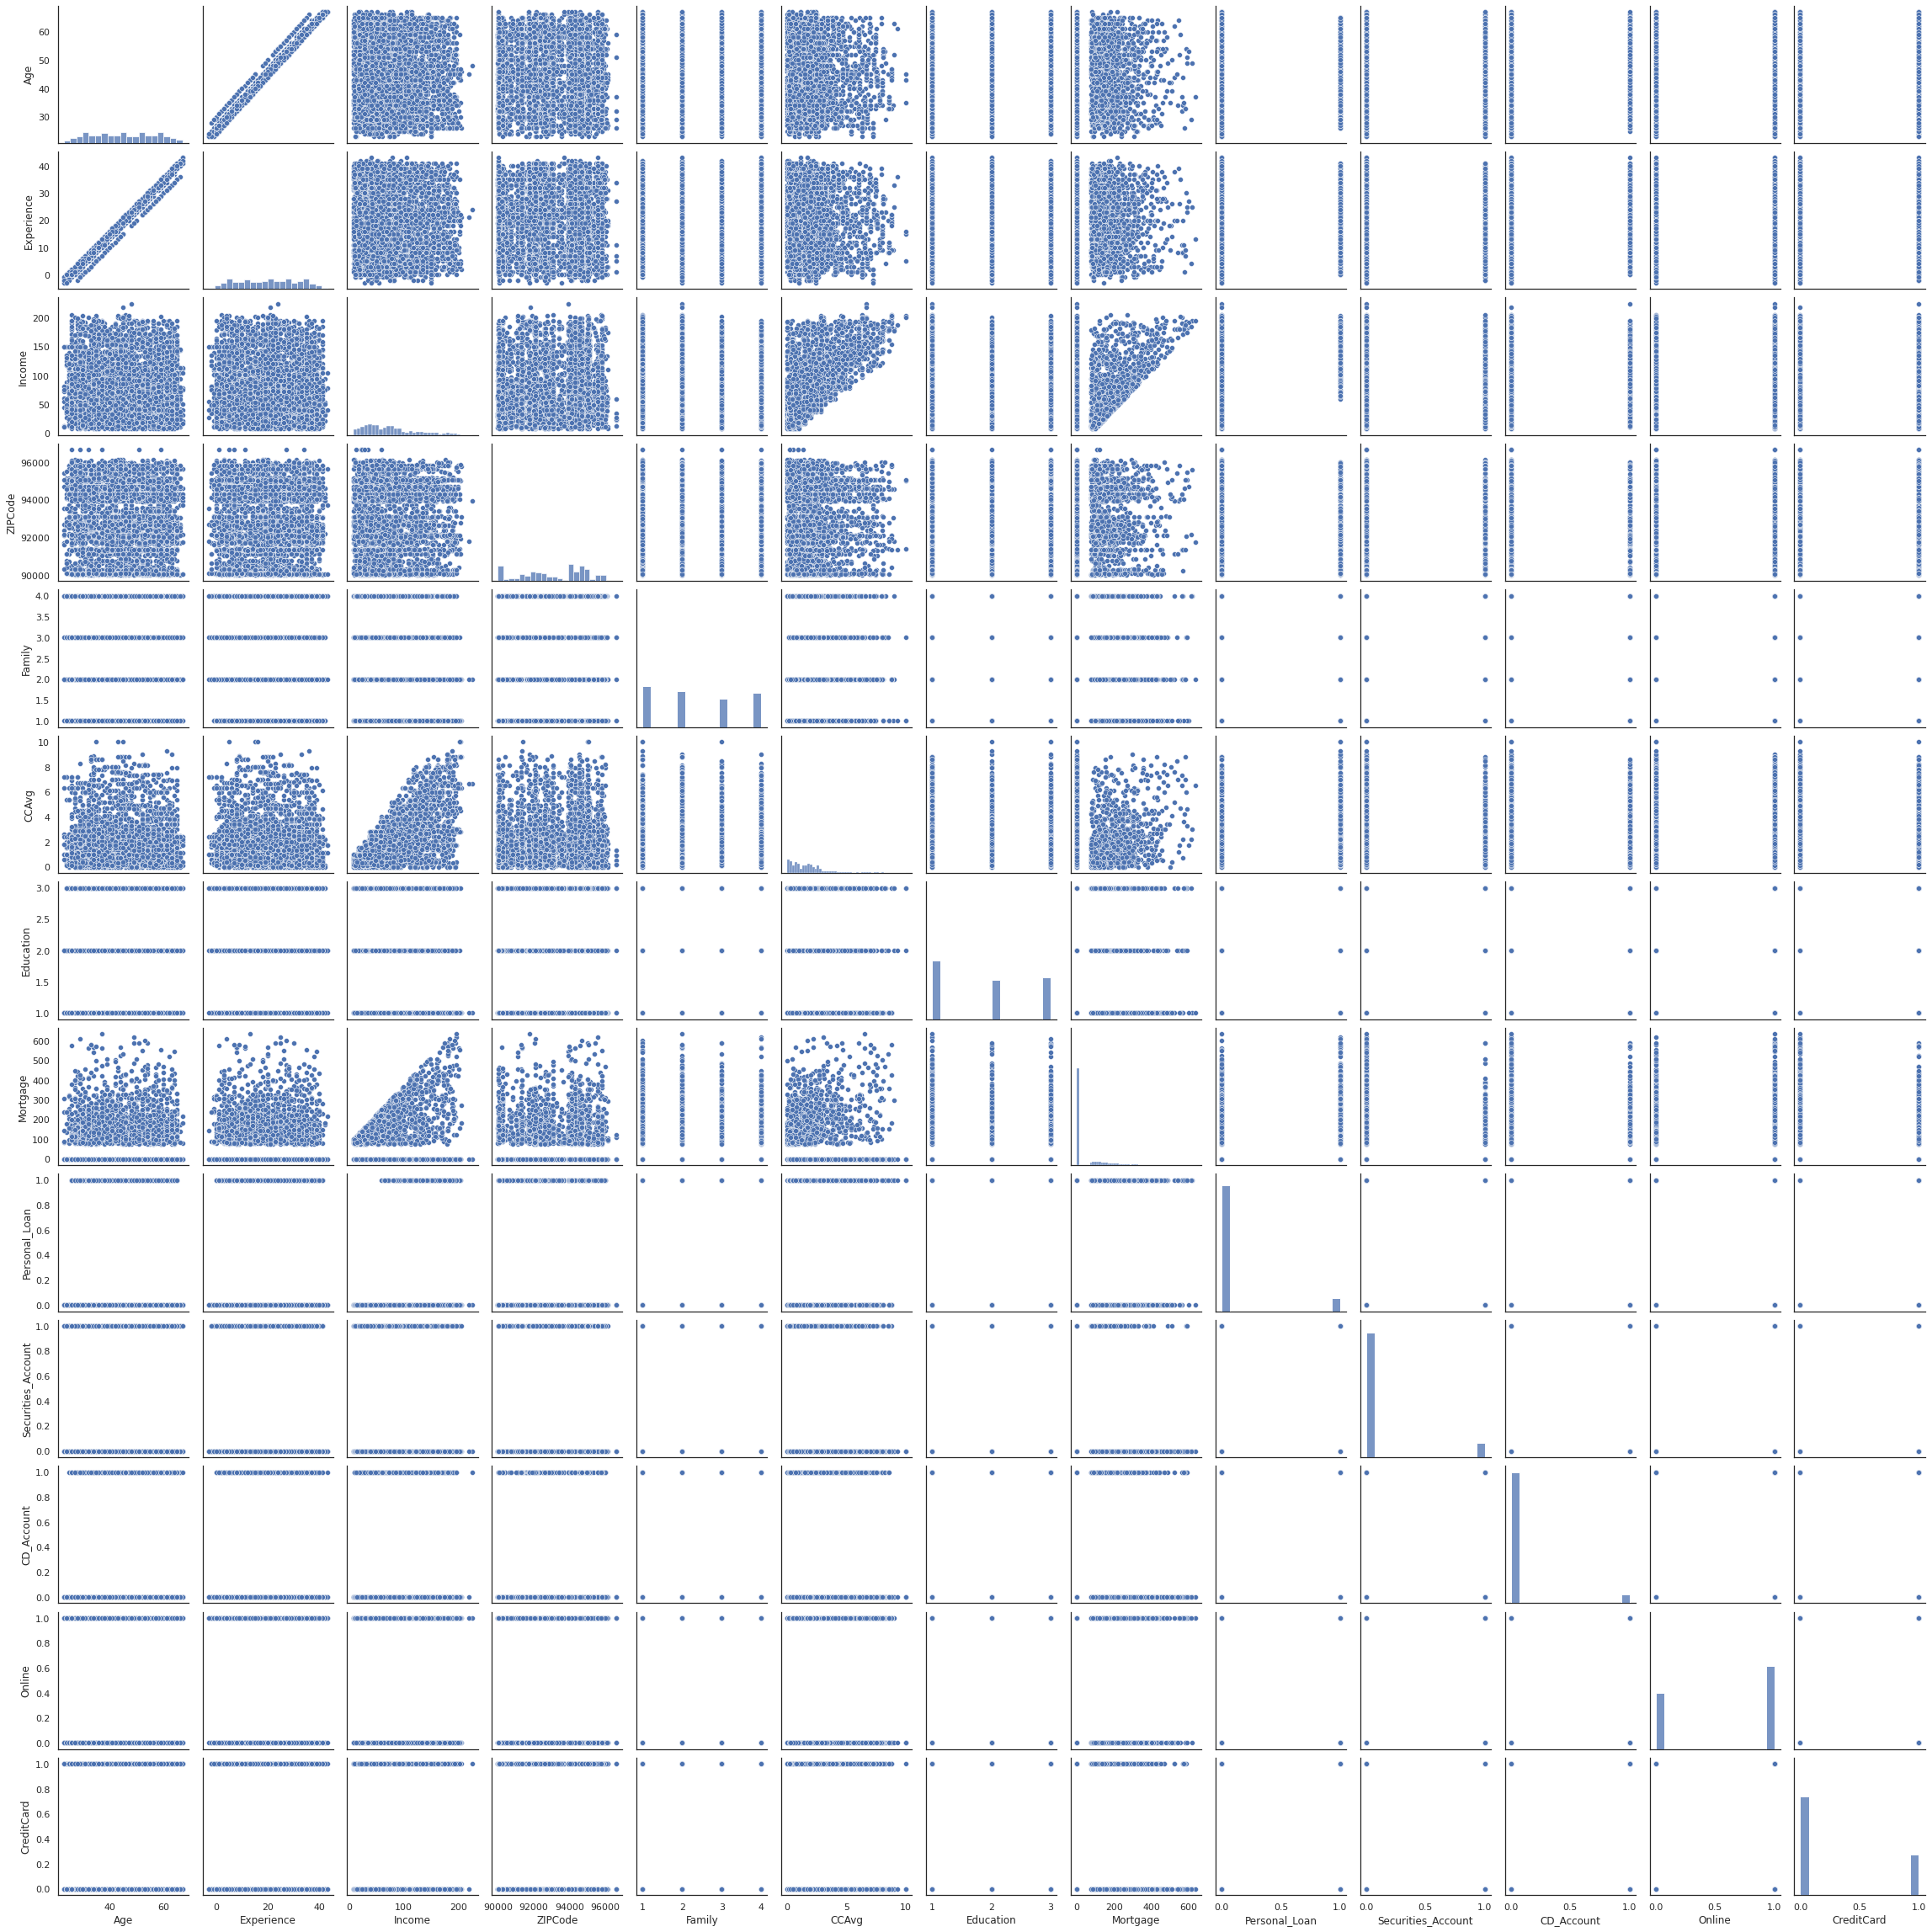

In [ ]:
sns.pairplot(data.iloc[:,1:]);

- 'Age' column is normally distributed. Here can see that the mean and median is almost same which we have also seen in the transpose matrics. Most of the customers age is between 25 to 65 years.
- 'Experience' is also normally distributed. Here also mean is amost equal to median. 'Experience' and 'Age' are stong positive association.
- 'Income' is positively skewed and it will also have the outlier
- We dont see any relationship with the ZIP Code and other variables.
- Family and Education has low association with the 'Personal Loan'.
- The disribution of CCAvg is also a positively skewed variable. Majority of the customers average monthly spending is between 1k to 9k.
- 'Mortgage' is also positively skewed. Majority of the individuals have a mortgage of less than 40K.

# EDA 

## Univariate and Bivariate analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

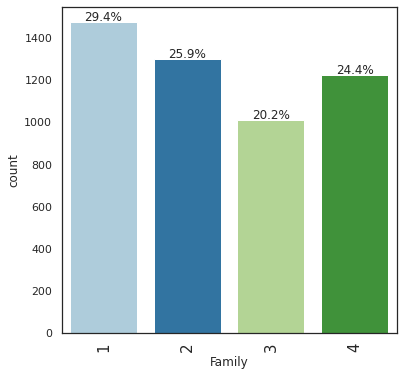

In [ ]:
labeled_barplot(data, "Family", perc=True)

Observation : Family of 1 is 29.4% which is the highest

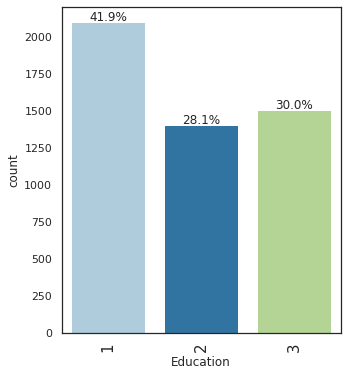

In [ ]:
labeled_barplot(data, "Education", perc=True)

Observation : Most of the people has Education Level 1

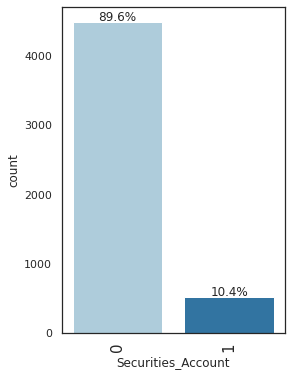

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)

Observation : 89.6% people does not have any Security Account 

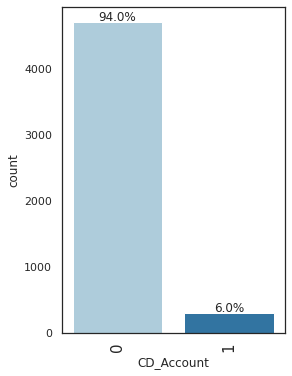

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)

Observation : 94% people does not have any CD Account 

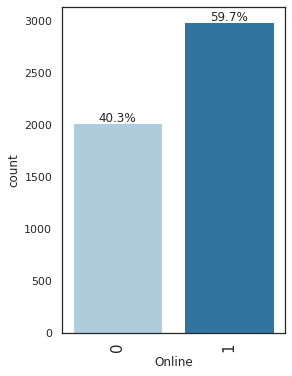

In [ ]:
labeled_barplot(data, "Online", perc=True)

Observation : Most of the people use internet 

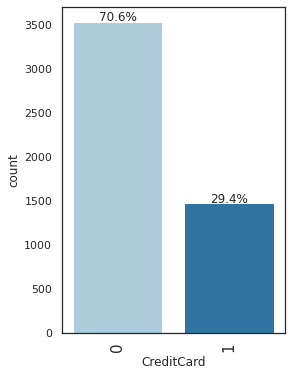

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)

Observation : 70.6% people does not have CreditCard

####Stacked Barplot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


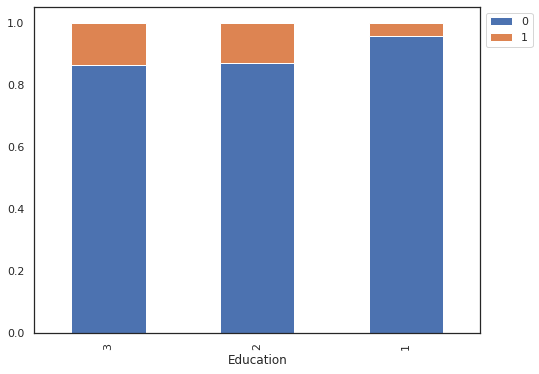

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan");

Observation : Education level 3 has 205 Personal Loan, but education level 1 have only 93 Personal Loan 

Securities_Account     0    1   All
Education                          
All                 4478  522  5000
1                   1872  224  2096
2                   1253  150  1403
3                   1353  148  1501
------------------------------------------------------------------------------------------------------------------------


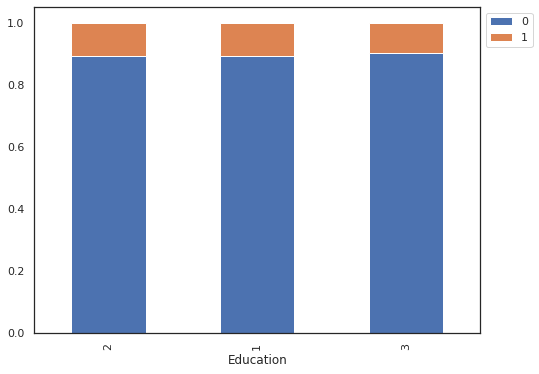

In [ ]:
stacked_barplot(data, "Education", "Securities_Account");

Observation : Education level 3 has less likely has Security Account than Education level 1 

CD_Account     0    1   All
Education                  
All         4698  302  5000
1           1978  118  2096
3           1405   96  1501
2           1315   88  1403
------------------------------------------------------------------------------------------------------------------------


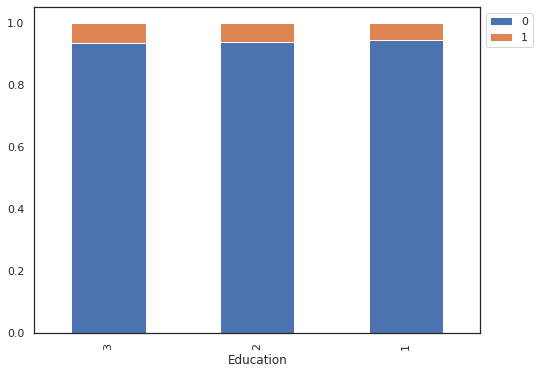

In [ ]:
stacked_barplot(data, "Education", "CD_Account");

Observation : Education level 1 has slightly more CD Account than others 

Online        0     1   All
Education                  
All        2016  2984  5000
1           841  1255  2096
3           632   869  1501
2           543   860  1403
------------------------------------------------------------------------------------------------------------------------


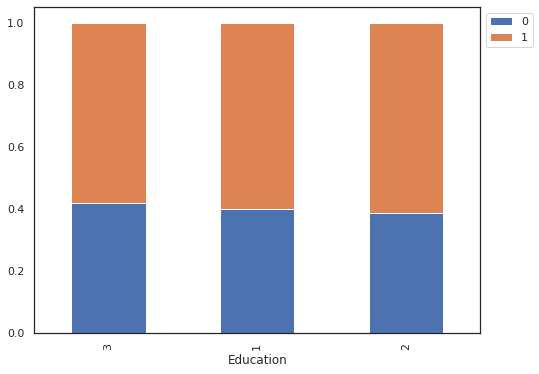

In [ ]:
stacked_barplot(data, "Education", "Online");

Observation : Internet has very little relationship with the education.

CreditCard     0     1   All
Education                   
All         3530  1470  5000
1           1463   633  2096
3           1064   437  1501
2           1003   400  1403
------------------------------------------------------------------------------------------------------------------------


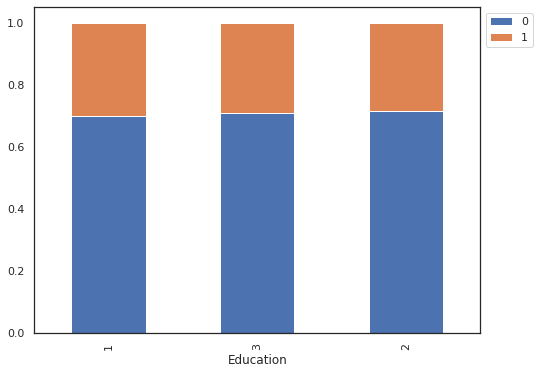

In [ ]:
stacked_barplot(data, "Education", "CreditCard");

Observation : Education level 1 has more Credit Card



####Boxplot

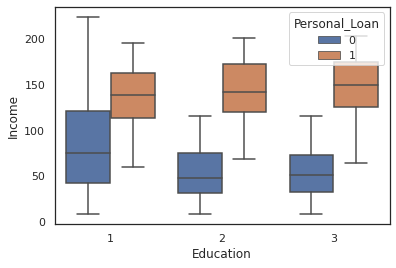

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=data);

Observation:

- Customers who took loan have same range of income irrespective of education level.
- Customers with education level of graduate and advanced/professional have higher chances of taking a loan.

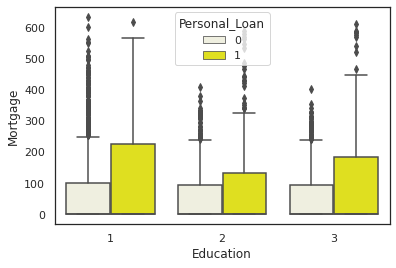

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=data,color='yellow');

Observation:

- Customers of any education level but with high value of house mortgage, have higher chances of taking a loan compared to those of the same education level but with low house mortagage value.

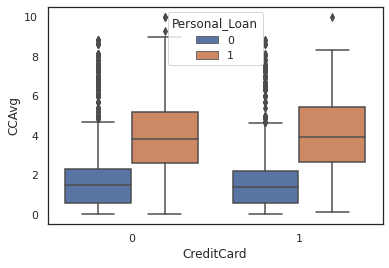

In [ ]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal_Loan", data=data);

Observation: 
- Customers who have credit card and monthly spending is higher are more likly to take loan.

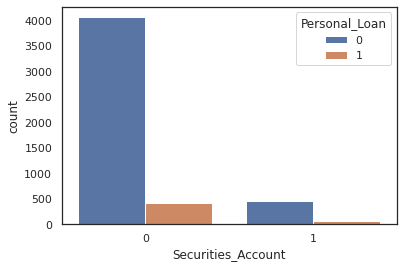

In [ ]:
sns.countplot(x="Securities_Account", data=data,hue="Personal_Loan");

Observation : 
- Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account.

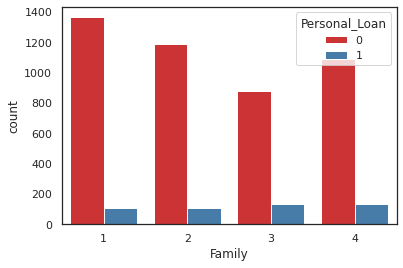

In [ ]:
sns.countplot(x='Family',data=data,hue='Personal_Loan',palette='Set1');

Observation : 
- Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

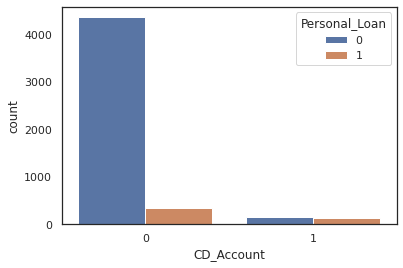

In [ ]:
sns.countplot(x='CD_Account',data=data,hue='Personal_Loan');

Observation:

- Customers who do not have a CD Account with the bank, do not have loan as well. This seems to be the majority.
- Also, almost all customers who have a CD Account with the bank, have taken the loan as well.

In [ ]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

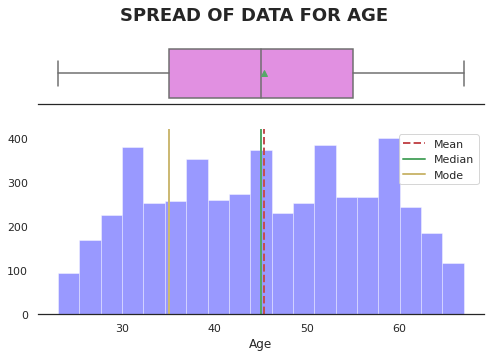

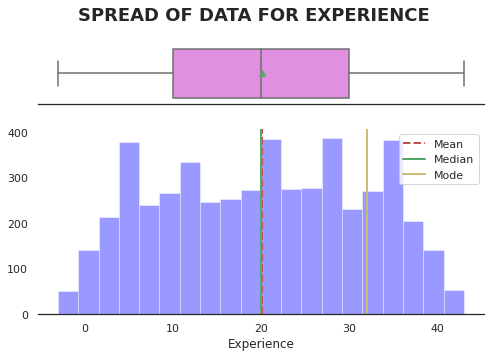

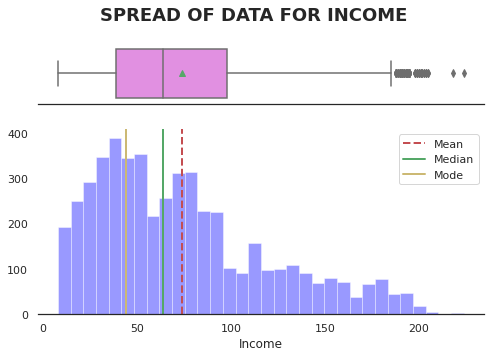

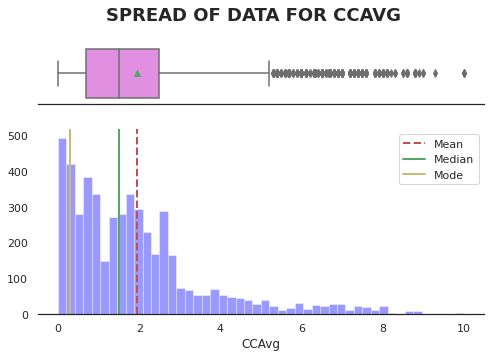

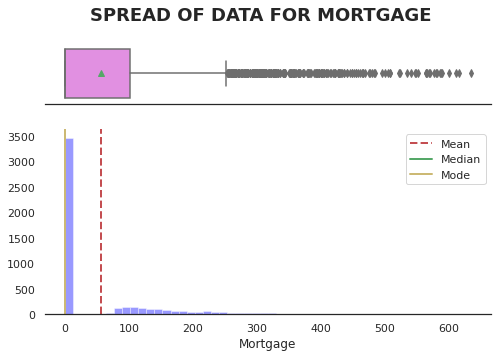

In [ ]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

Observations

- Age and experience both has same distrubtion with spike at 5 points.
- Income is right skewed and has some outlier on higher side which can be clipped.
- Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
- Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped.

***Distplot***

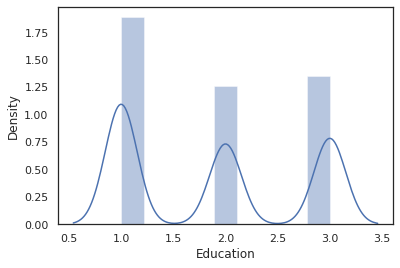

In [ ]:
sns.distplot(data['Education'])

Observation: 
- Undergrad level customers are more than the Graduate and Advanced/Professional customers.

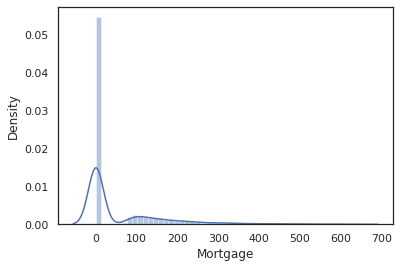

In [ ]:
sns.distplot(data['Mortgage'])

Observation:
- The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage. There are more customers whose mortgage amount is between  80000 to 150000 . Very few customers whos mortgage amount is more than $600000.

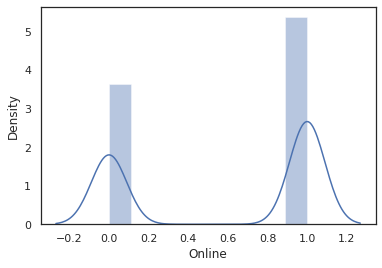

In [ ]:
sns.distplot(data['Online'])

Observation: 
- This is a Bernoulli Distribution. Number of customers who have Online account is greater than the number of customers who do not have online account

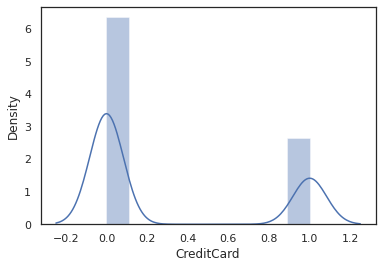

In [ ]:
sns.distplot(data['CreditCard'])

Observation: 
- It is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

***Target column distribution and Data Visualization with Personal Loan Column***

In [ ]:
loan_counts = pd.DataFrame(data["Personal_Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal_Loan"]
loan_counts

,Labels,Personal_Loan
0,0,4520
1,1,480


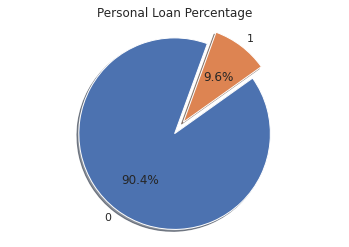

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal_Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

Important : From the above we can see that the data is having a huge bias(almost 1:10) towards the category of people not accepting the personal loan. Hence we can build an opinion that our model will tends to perform better towards predicting which customers will not accept the personal loan. However, our goal is to identify the customer who can accept the personal loan based on the given features.

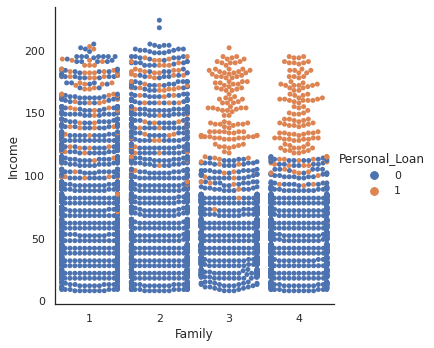

In [ ]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='swarm');

Observation: Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

***Distplot****

Text(0.5, 1.0, 'CCAvg Distribution')

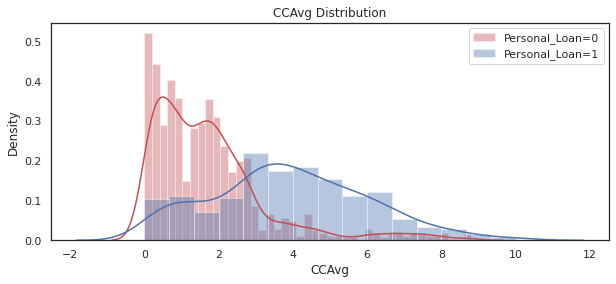

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal_Loan"] == 0]['CCAvg'], color = 'r',label='Personal_Loan=0')
sns.distplot(data[data["Personal_Loan"] == 1]['CCAvg'], color = 'b',label='Personal_Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

Observation: 
- Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [ ]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal_Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal_Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Comment: 
- The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

Text(0.5, 1.0, 'Income Distribution')

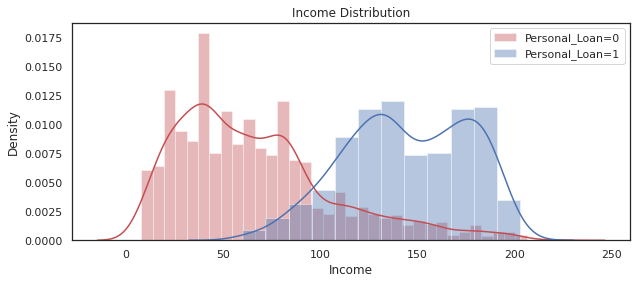

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal_Loan"] == 0]['Income'], color = 'r',label='Personal_Loan=0')
sns.distplot(data[data["Personal_Loan"] == 1]['Income'], color = 'b',label='Personal_Loan=1')
plt.legend()
plt.title("Income Distribution")

Observation: 
- Customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

***Correlation with Heat Map***

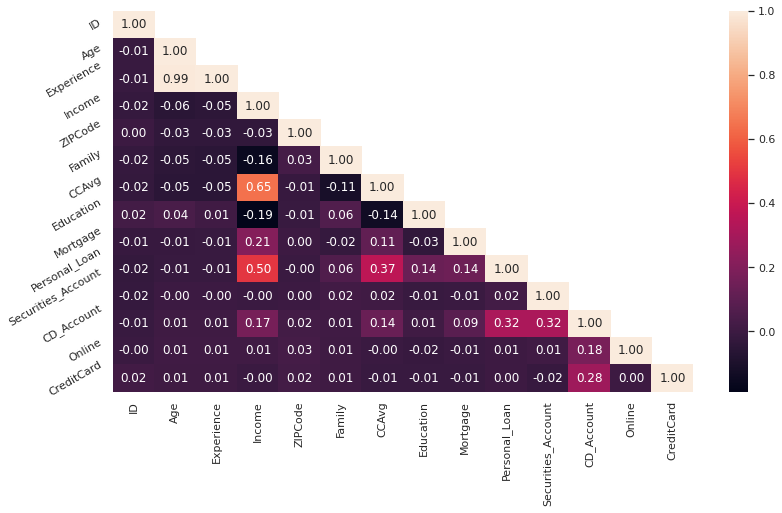

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation

- Income and CCAvg is moderately correlated.
- Age and Experience is highly correlated

####***Data Pre-processing***

**Error Fixing(Data Cleaning) :**

In [ ]:
# Checking the negative values
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
data[data['Experience'] < 0]['Experience'].count()

52

- There are 52 records with negative Experience are present in the dataset.

In [ ]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [ ]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

- Replace the negative value with Median of Experience column

In [ ]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Now we can see that negative values count is 0 means there is no negative value anymore in the dataframe.

- Describing the 'Experience' column to check the count, mean, standard deviation and five point summary.

***Checking of NAN value***

In [ ]:
data.isnull().sum()

ID                     0
Age                    0
Experience            29
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
226,227,24,NaN,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,NaN,51,90630,3,0.30,3,0,0,0,0,1,0
524,525,24,NaN,75,93014,4,0.20,1,0,0,0,0,1,0
583,584,24,NaN,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,NaN,125,92835,2,7.20,1,0,0,1,0,0,1
670,671,23,NaN,61,92374,4,2.60,1,239,0,0,0,1,0
686,687,24,NaN,38,92612,4,0.60,2,0,0,0,0,1,0
793,794,24,NaN,150,94720,2,2.00,1,0,0,0,0,1,0
889,890,24,NaN,82,91103,2,1.60,3,0,0,0,0,1,1
909,910,23,NaN,149,91709,1,6.33,1,305,0,0,0,0,1


In [ ]:
data['Experience'].isnull().sum()

29

- There are 29 NAN values in 'Experience' column 

In [ ]:
# Replace NaNs in column Experience with the mean of values in the same column
data['Experience'].fillna(value=data['Experience'].mean(), inplace=True)

In [ ]:
data['Experience'].isnull().sum()

0

- There is no NAN value in 'Experience' column after replacing with mean

***Outlier Detection***

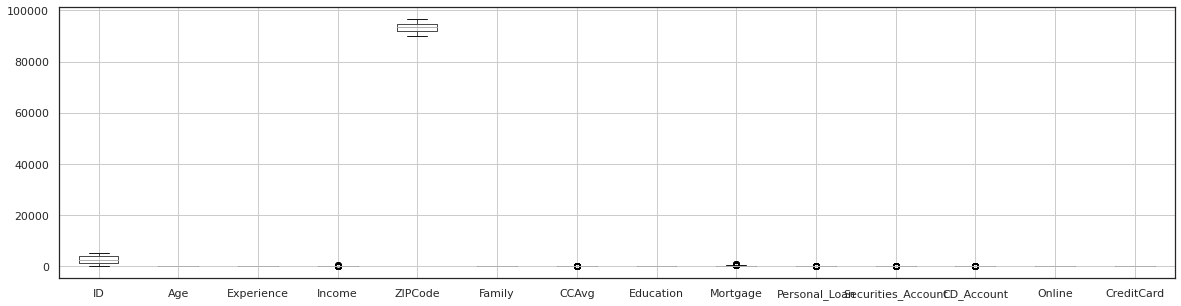

In [ ]:
data.boxplot(return_type='axes', figsize=(20,5));

Comment: 
- From the above boxplot we can see there are outliers on few colomns. Mortgage has more number of outlier. Income, CCAvg have also outliers. We will try to fix the outlier by scaling the attributes.

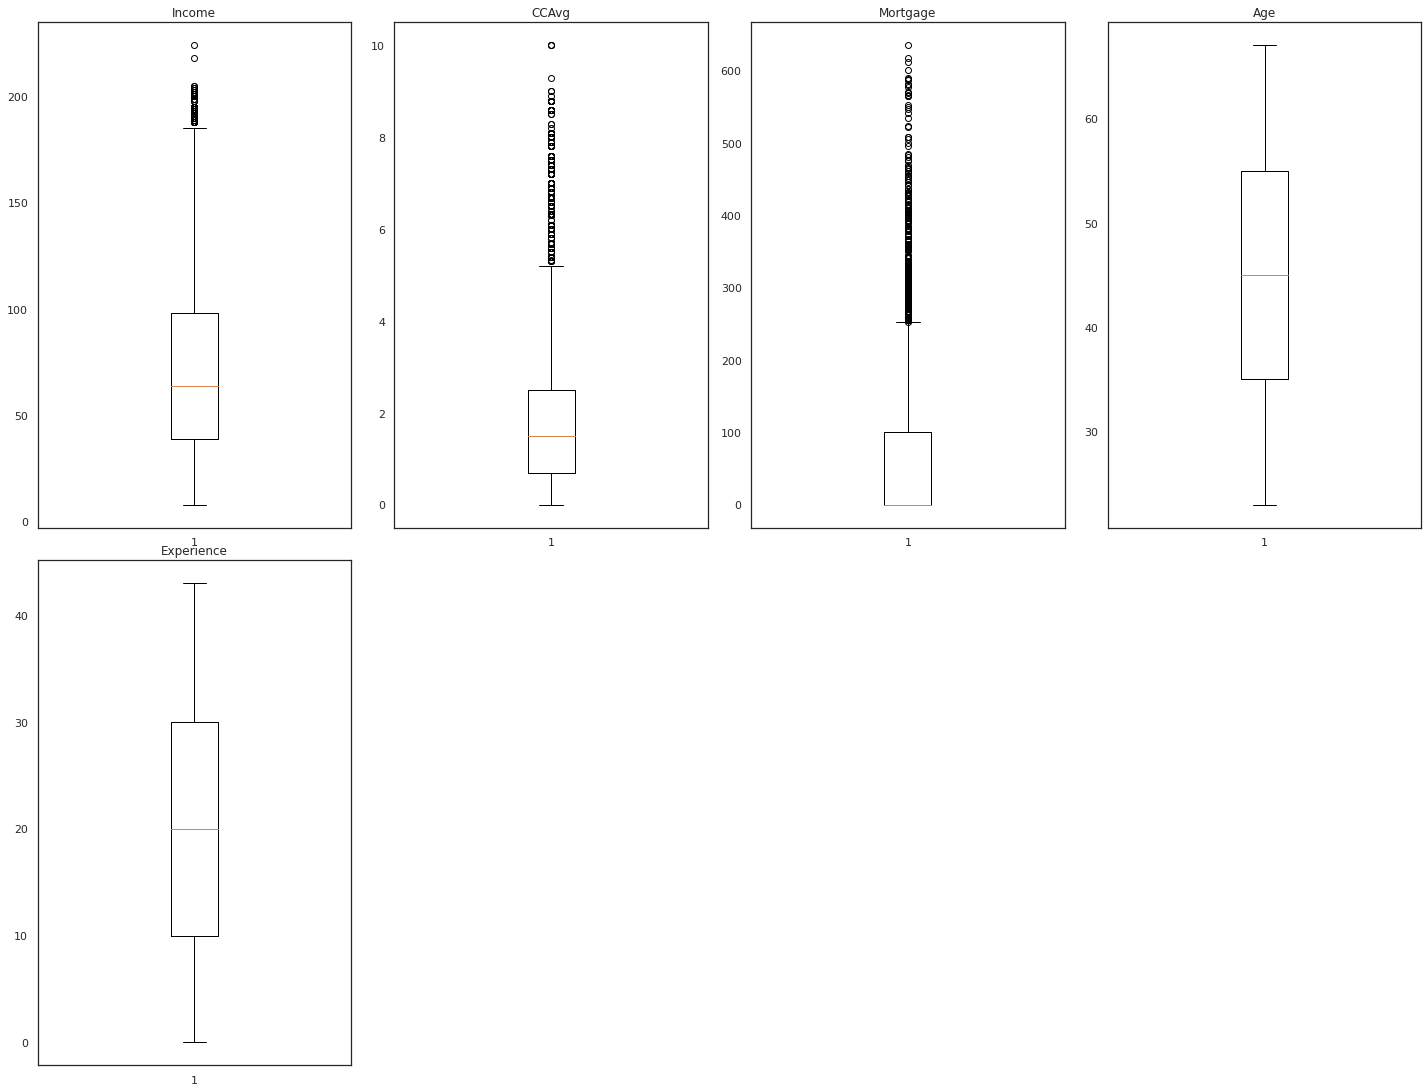

In [ ]:
numeric_columns =['Income','CCAvg','Mortgage','Age', 'Experience']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- This is some really extreme values in income 224K USD compared to same age group and experience. 
- Values for Credit card and Mortages looks fine. 
- After identifying outliers, we can decide whether to remove/treat them or not. It depends, here we are not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

###***Data Preparation and Spliting***

As we have seen from the EDA, ID and ZIP Code attributes are not relevant for our model building so we will drop it.

In [ ]:
data.drop(["ID", "ZIPCode"], axis=1, inplace=True)

In [ ]:
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## ***Building the model - Logistic Regression***

***Model evaluation criteria***

***Model can make wrong predictions as:***
- Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
- Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

***Which case is more important?***

- The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team . It's lost of opportunity. So we want to minimize this loss.

***How to reduce losses?i.e need to reduce False Negatives ?***

- In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model. Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.
- We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
- Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
# To build model for prediction

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [ ]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,0.016187,-0.010896,0.052525,0.712179,0.166921,1.654524,0.000772,-0.837184,3.262462,-0.528974,-0.946025


### Coefficient interpretations

- Coefficient of Income, Education, Family, CCAvg, CD Account, Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
- Coefficient of Experience, Securities account, online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,1.016318,0.989163,1.053929,2.038428,1.18166,5.230590,1.000772,0.432928,26.113762,0.589209,0.388281
Change_odd%,1.631840,-1.083714,5.392924,103.842830,18.16604,423.059029,0.077244,-56.707221,2511.376175,-41.079075,-61.171877


***Coefficient interpretations***

- Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 1.05 times or a 5.39% chance of a customer taking personal loan.
- Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 2.03 times or 103.84% increase in the odds of a customer taking personal loan.
- CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.18 times or a 18.16% increase in the odds of a customer taking personal loan.
- Education Advance has 5 times higher chances of taking a personal loan than undergraduate Interpretation for other attributes can be done similarly.
- Most overall significant varaibles are Income,Education, CD account ,Family and CCAvg

###***Checking model performance on training set***

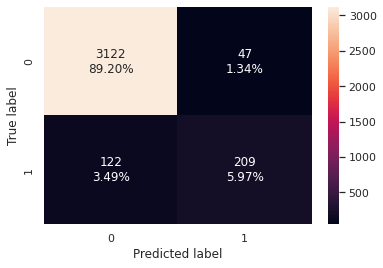

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951714,0.63142,0.816406,0.712095


- Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the model .We have recall as 63 on train. False negative are 122 on train. We can further improve this score using Optimal threshold for ROC AUC curve and precision recall curve

***ROC-AUC on training set***

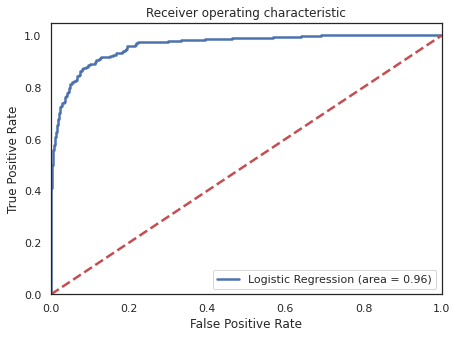

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a generalized performance on training and test set.
- ROC-AUC score of 0.96 on training and test set is quite good.

***Model Performance Improvement***

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 


In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13151087942096162


#### Checking model performance on training set

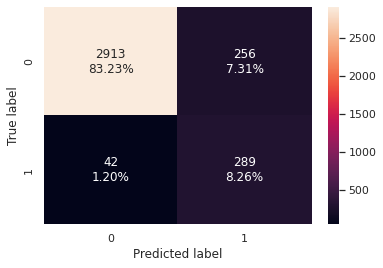

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

#### ***Checking model performance on train set***

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.914857,0.873112,0.530275,0.659817


- Model is giving improvement on recall but accuracy , precision and F1 score decreased significantly 
- With 0.13 Threshold the Recall score has improved from 63% to 87% on train data with 91% accuracy. Also False negative values has decreased to 42 from 122 for train data. 

#### ***Let's use Precision-Recall curve and see if we can find a better threshold***

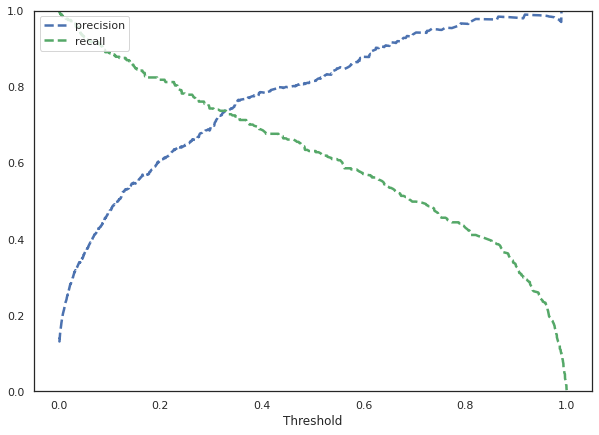

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.33 we will get equal precision and recall but taking a step back and selecting value around 0.27 will provide a higher recall and a good precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.27

***Checking model performance on training set***

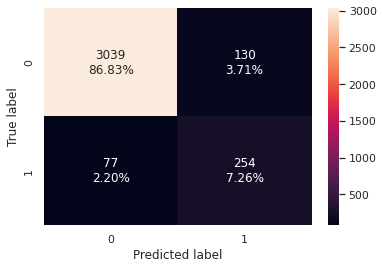

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940857,0.767372,0.661458,0.71049


* Model is performing well on training and test
* Recall did not improve as compared to the initial model.


### ***Let's check the performance on the test set***

**Using the model with default threshold**

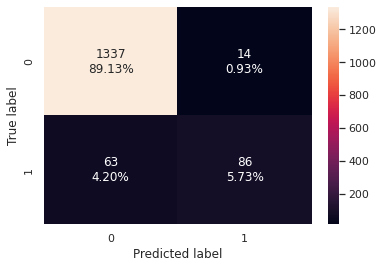

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948667,0.577181,0.86,0.690763


***ROC-AUC on test set***

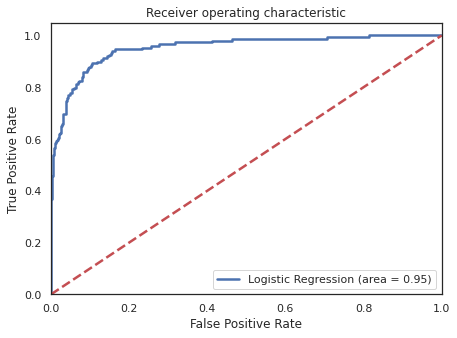

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

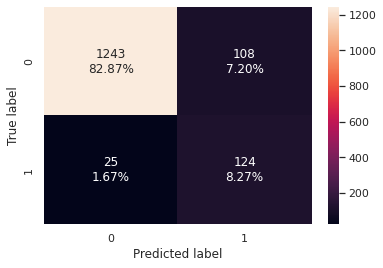

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.911333,0.832215,0.534483,0.650919


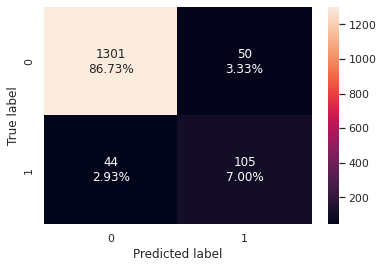

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.937333,0.704698,0.677419,0.690789


***Model performance comparison for trainning set***

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.27 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.33 Threshold,Logistic Regression-0.27 Threshold
Accuracy,0.951714,0.914857,0.940857
Recall,0.631420,0.873112,0.767372
Precision,0.816406,0.530275,0.661458
F1,0.712095,0.659817,0.710490


***Model Performance comparison for testing set***

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.27 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.33 Threshold,Logistic Regression-0.27 Threshold
Accuracy,0.948667,0.911333,0.937333
Recall,0.577181,0.832215,0.704698
Precision,0.860000,0.534483,0.677419
F1,0.690763,0.650919,0.690789


### ***Summary*** 

- The 0.33 threshhold is giving more recall for both trainning and testing set but 0.27 threshold is giving better balance for all the performance parameter 

- For 0.27 threshold model, False negative cases have gone up and recall for test is 70 with 93.7 % accuracy. Model is performing well on training and test set. Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used. Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.


## ***Model Building Decision tree***

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


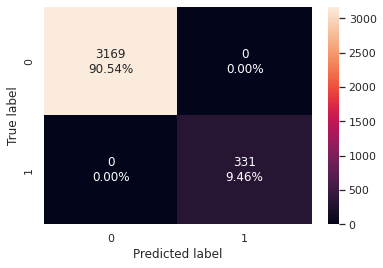

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


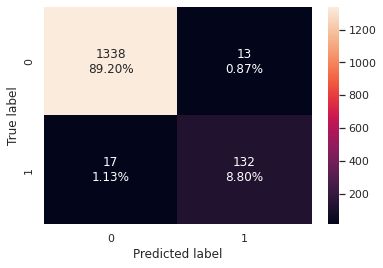

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

- Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

***Visualizing the Decision Tree***

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


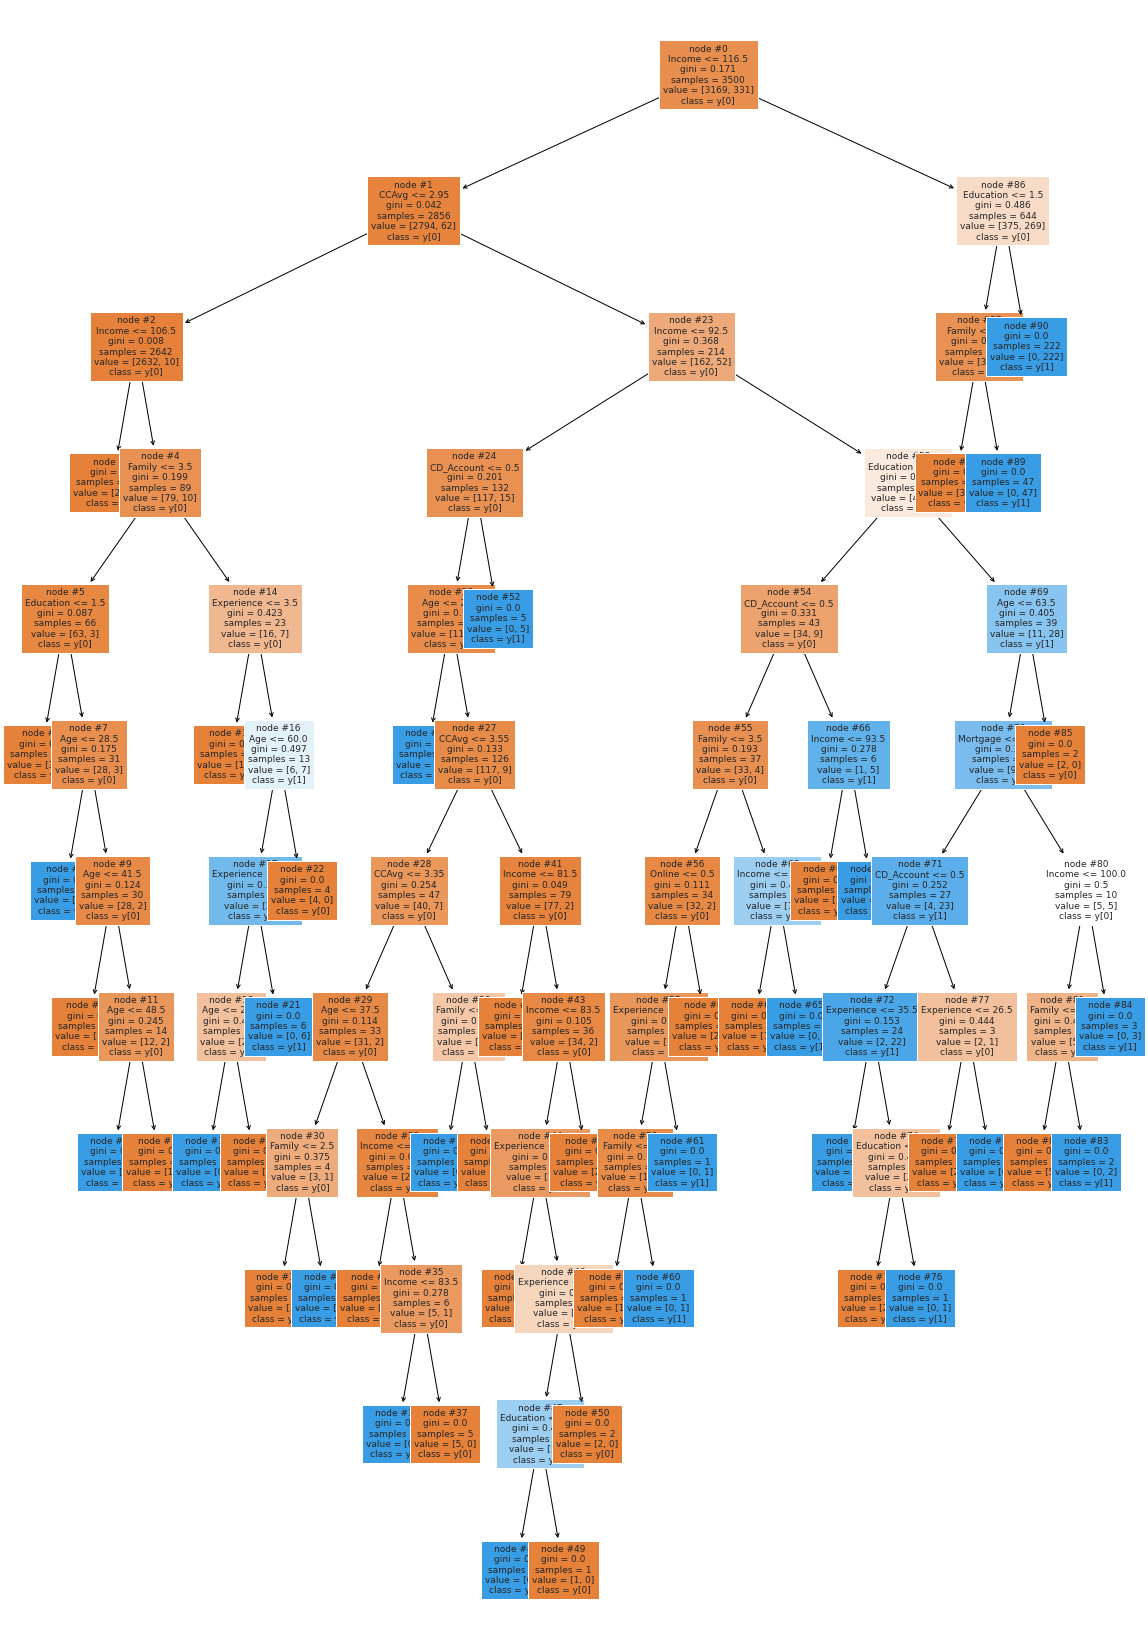

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

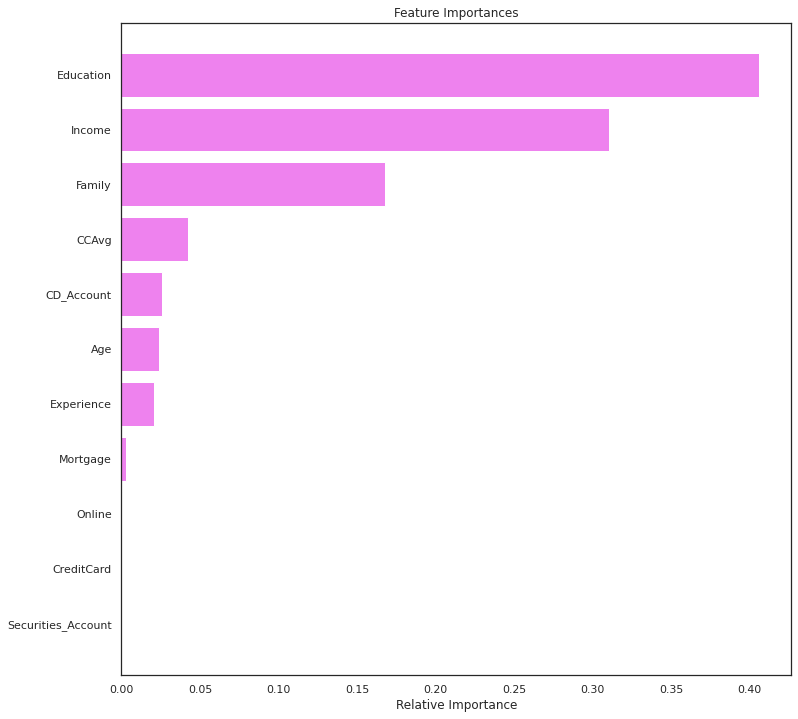

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

***Using GridSearch for Hyperparameter tuning of our tree model***
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
- Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.997429,0.97281,1.0,0.986217


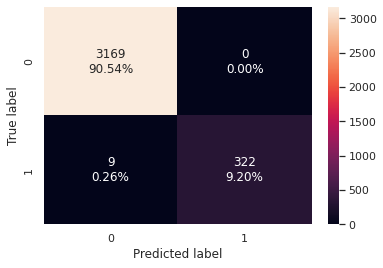

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.879195,0.935714,0.906574


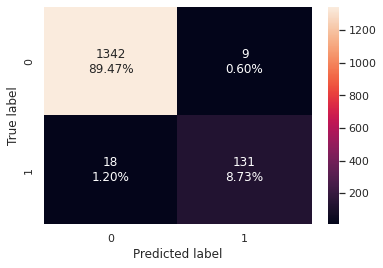

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

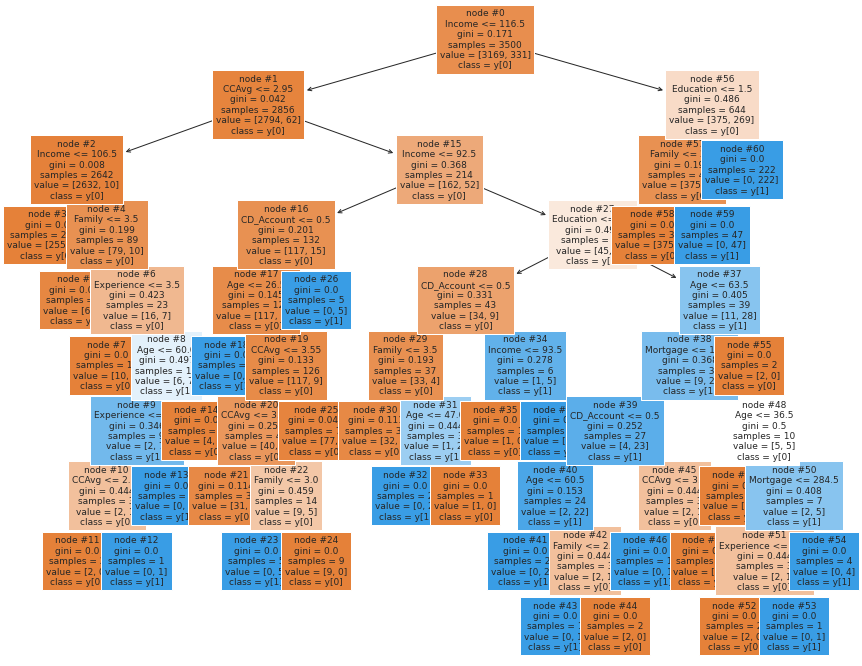

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

- With HyperParameter the overfitting on train has reduced, but the recall for test has not improved.
- Important features are Income,Education  and Education, Family , Family , CCavg & Age.
- But the recall metric is still 87 and false negatives are 18. We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

###***Cost Complexity Pruning***

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000409,0.006423
9,0.000476,0.006900


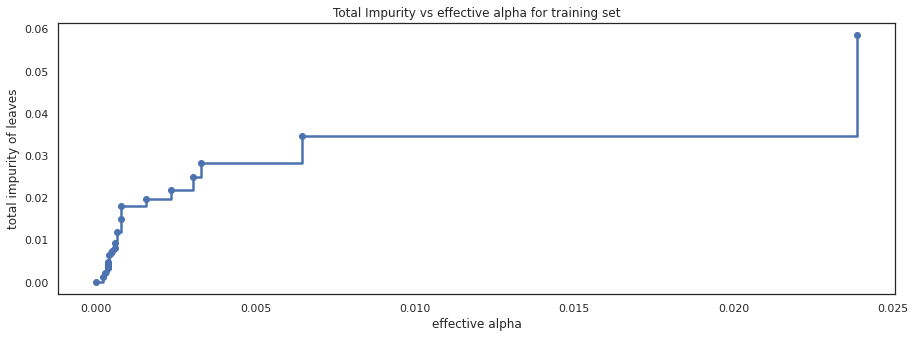

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


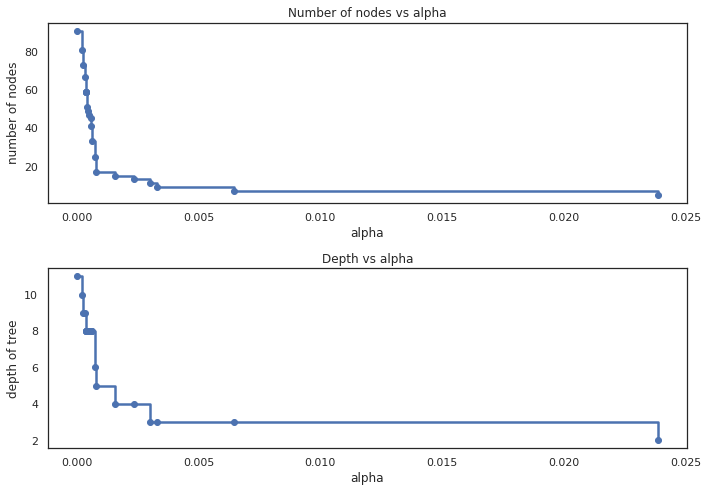

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

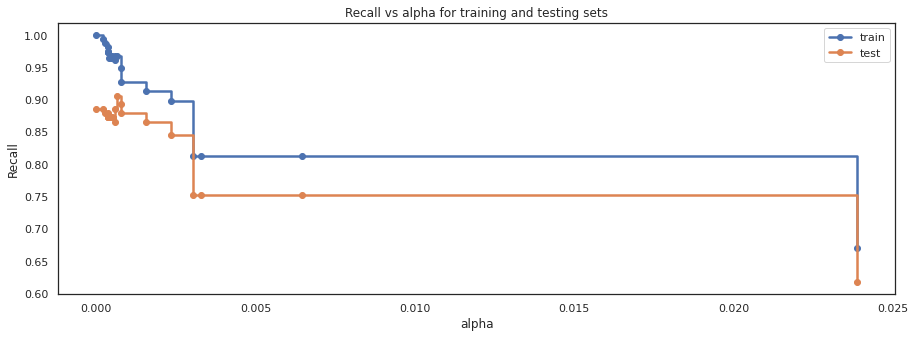

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.992857,0.966767,0.958084,0.962406


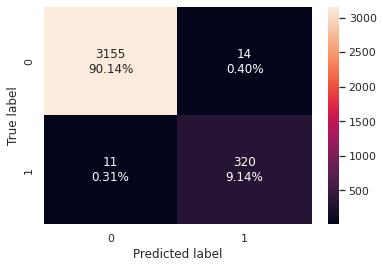

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


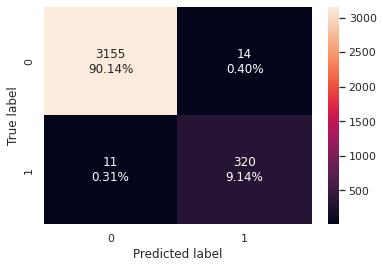

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

- The Recall on train and test indicate we have created a generalized model. with 98 % accuracy and reduced False negatives.

***Visualizing the Decision Tree***

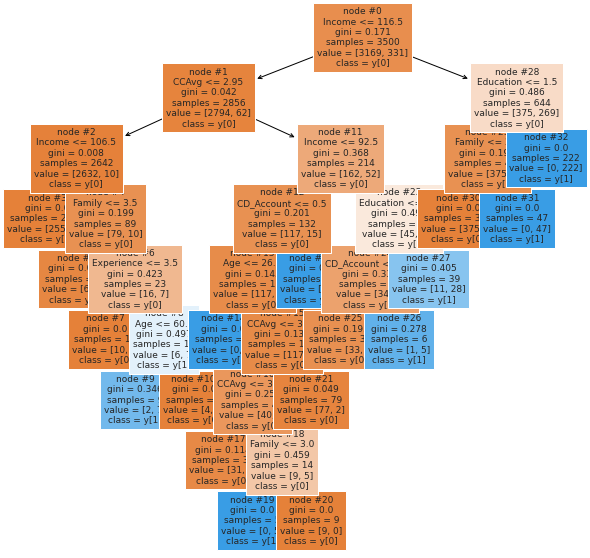

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


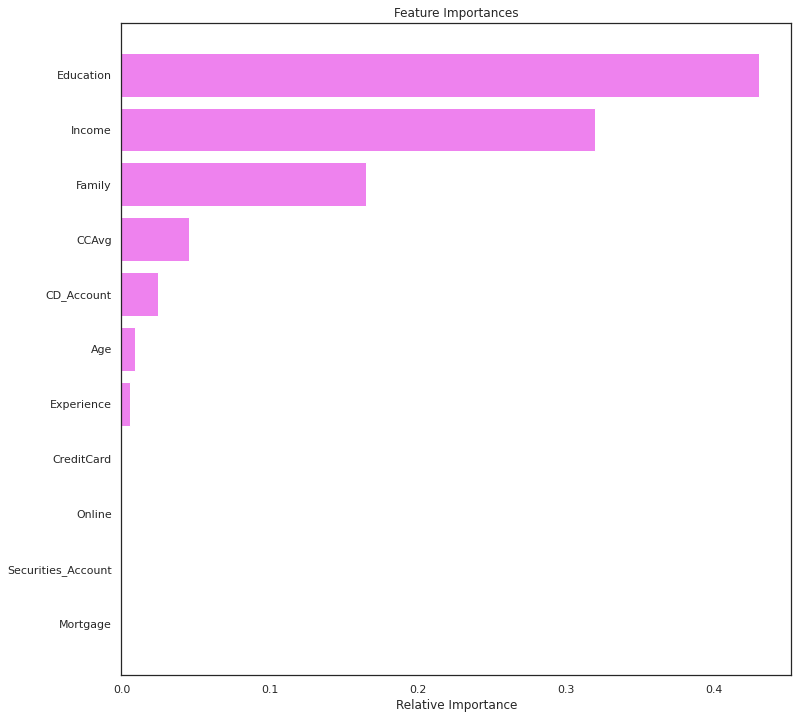

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.997429,0.992857
Recall,1.0,0.972810,0.966767
Precision,1.0,1.000000,0.958084
F1,1.0,0.986217,0.962406


In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.982000,0.984000
Recall,0.885906,0.879195,0.906040
Precision,0.910345,0.935714,0.931034
F1,0.897959,0.906574,0.918367


Decision tree model post pruning has given us best recall scores on data with 98% accuracy . Exploratory data analysis also suggested income and education were important features in deciding if person will borrow personal loan. so choosing Decision Tree with post-pruning for our prediction.

# ***Conclusion***

- We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
- First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income,Education, CD account ,Family and CCAvg .
- Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
- Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
- We also improved the performance using ROC-AUC curve and optimal threshold .This was best model with high recall and accuracy .
- Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.
- We used decision trees with prepruning and post pruning. The Post pruning model gave 90 % recall with 98% accuracy.
- Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

# ***Recommendations***

- Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.
- Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.
- Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.
- So for this campaign we can have different profiles for customers.
- High Profile Clients :- Higher income, Advanced/Graduate level education, 3/4 Family members, high spending
- Average Profile :- Medium income group, Graduate level education. 3/4 Family members, medium spending
- Low Profile:- Lower income group, undergrads , 3/4 Family Member, low spending
Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.
- We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.
- Prequalifying for Loan can also attract more customers.
- Our 2nd target would be Medium profile customers.
- The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.

In [ ]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! jupyter nbconvert --to html /content/3_Project_Personal_Loan_Campaign_Quazi_Nahida_Sultana.ipynb

[NbConvertApp] Converting notebook /content/3_Project_Personal_Loan_Campaign_Quazi_Nahida_Sultana.ipynb to html
[NbConvertApp] Writing 4331704 bytes to /content/3_Project_Personal_Loan_Campaign_Quazi_Nahida_Sultana.html
